# 1) Set up

In [1]:
# rewind back to root
from os import path, chdir, listdir
chdir('..')

In [2]:
# imports
import numpy as np
from ucr import load_UCR_dataset
from utils import plot_with_labels
from config import PATH_TO_DATA, PATH_TO_MODELS, PATH_TO_DATA_UCR, PATH_TO_MODELS_UCR
from itertools import compress
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from models.models_utils import load_pretrained

%matplotlib inline

# 2) Pre-trained models

In [3]:
# List pre-trained
ls_pretrained = listdir( path.join(PATH_TO_MODELS, PATH_TO_MODELS_UCR) )
ls_pretrained = [i_[:-4] for i_ in ls_pretrained if ".pkl" in i_]

# Cut name extension
extension = [i_.index('_CausalCNN') for i_ in ls_pretrained]
ls_pretrained = [i_[:j_] for (i_, j_) in zip(ls_pretrained, extension)]



In [4]:
# Select a couple at random
id_selected = np.random.choice(len(ls_pretrained), 5)
ls_pretrained = list( compress(ls_pretrained, id_selected) )

print(ls_pretrained)

# Load them
loaded_models = [load_pretrained(i_, 'encoder') for i_ in ls_pretrained]
loaded_models

['TwoLeadECG', 'UWaveGestureLibraryY', 'Ham', 'Meat', 'Rock']


[CausalCNNEncoderClassifier(batch_size=10, channels=40, compared_length=inf,
               cuda=False, depth=10, early_stopping=None, gpu=False,
               in_channels=1, kernel_size=3, lr=0.001, nb_random_samples=2,
               nb_steps=1500, negative_penalty=1, out_channels=320,
               penalty=None, reduced_size=160),
 CausalCNNEncoderClassifier(batch_size=10, channels=40, compared_length=inf,
               cuda=False, depth=10, early_stopping=None, gpu=False,
               in_channels=1, kernel_size=3, lr=0.001, nb_random_samples=2,
               nb_steps=1500, negative_penalty=1, out_channels=320,
               penalty=None, reduced_size=160),
 CausalCNNEncoderClassifier(batch_size=10, channels=40, compared_length=inf,
               cuda=False, depth=10, early_stopping=None, gpu=False,
               in_channels=1, kernel_size=3, lr=0.001, nb_random_samples=2,
               nb_steps=1500, negative_penalty=1, out_channels=320,
               penalty=None, reduc

# 3) Data 

In [5]:
# Load data
complete_path = path.join(PATH_TO_DATA, PATH_TO_DATA_UCR)
loaded_data = [load_UCR_dataset(complete_path, i_) for i_ in ls_pretrained]


In [6]:
print(ls_pretrained)

['TwoLeadECG', 'UWaveGestureLibraryY', 'Ham', 'Meat', 'Rock']


In [31]:
# Encode data
id_ = 2
print(ls_pretrained[id_])

# Pick data
mdl = loaded_models[id_]
dt_tr = loaded_data[id_][0] # training data
dt_trlab = loaded_data[id_][1] # training labels
dt_ts = loaded_data[id_][2] # test data
dt_tslab = loaded_data[id_][3] # test labels

# Encode
enc_tr = mdl.encode(dt_tr)
enc_ts = mdl.encode(dt_ts)

Ham


In [26]:
dt_tr.shape

(109, 1, 431)

In [33]:
enc_tr.shape

(109, 320)

In [21]:
# Dimensionality reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
ENC_tr_tsne = tsne.fit_transform(enc_tr)
ENC_ts_tsne = tsne.fit_transform(enc_ts)
print(ENC_tr_tsne.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 896 samples in 0.003s...
[t-SNE] Computed neighbors for 896 samples in 0.400s...
[t-SNE] Computed conditional probabilities for sample 896 / 896
[t-SNE] Mean sigma: 0.688517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.183735
[t-SNE] KL divergence after 300 iterations: 0.791685
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3582 samples in 0.021s...
[t-SNE] Computed neighbors for 3582 samples in 7.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3582
[t-SNE] Computed conditional probabilities for sample 2000 / 3582
[t-SNE] Computed conditional probabilities for sample 3000 / 3582
[t-SNE] Computed conditional probabilities for sample 3582 / 3582
[t-SNE] Mean sigma: 0.479427
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.447990
[t-SNE] KL divergence after 300 iterations: 1.625545
(896, 2)


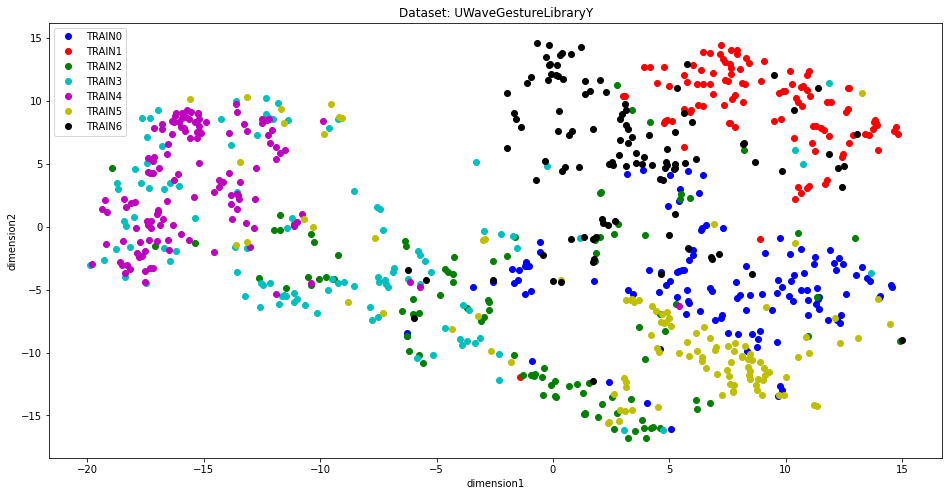

In [23]:
hF, Ax = plot_with_labels(ENC_tr_tsne, dt_trlab, marker='o',
                          legend='TRAIN', 
                          title='Dataset: %s'%(ls_pretrained[id_]))